# BOOM BIKES 

### BIKE SHARING ASSIGNMENT

#### OBJECTIVE:
  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset
#### Import useful Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary libraries:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sns.set()

### Loading Dataset

In [3]:
#LOADING DATASET
boom_bikes=pd.read_csv(r'C:\Users\Mohit Pathak\Documents\UPGRAD\Linear Regression\Bike Assignment\day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Dropping unwanted columns
boom_bikes.drop(['dteday','instant'],axis=1,inplace=True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking Dataset
##### Inspect the various aspects of the Biking dataframe

In [5]:
boom_bikes.shape

(730, 14)

In [6]:
#Check information about the dataset
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [7]:
#Check information about the dataset
boom_bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check null/missing values in each column.
round((100*(boom_bikes.isnull().sum())/len(boom_bikes)),2)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# Check null/missing values in each row.
round((100*(boom_bikes.isnull().sum(axis=1))/len(boom_bikes)),2).sort_values(ascending= False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

### Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables 

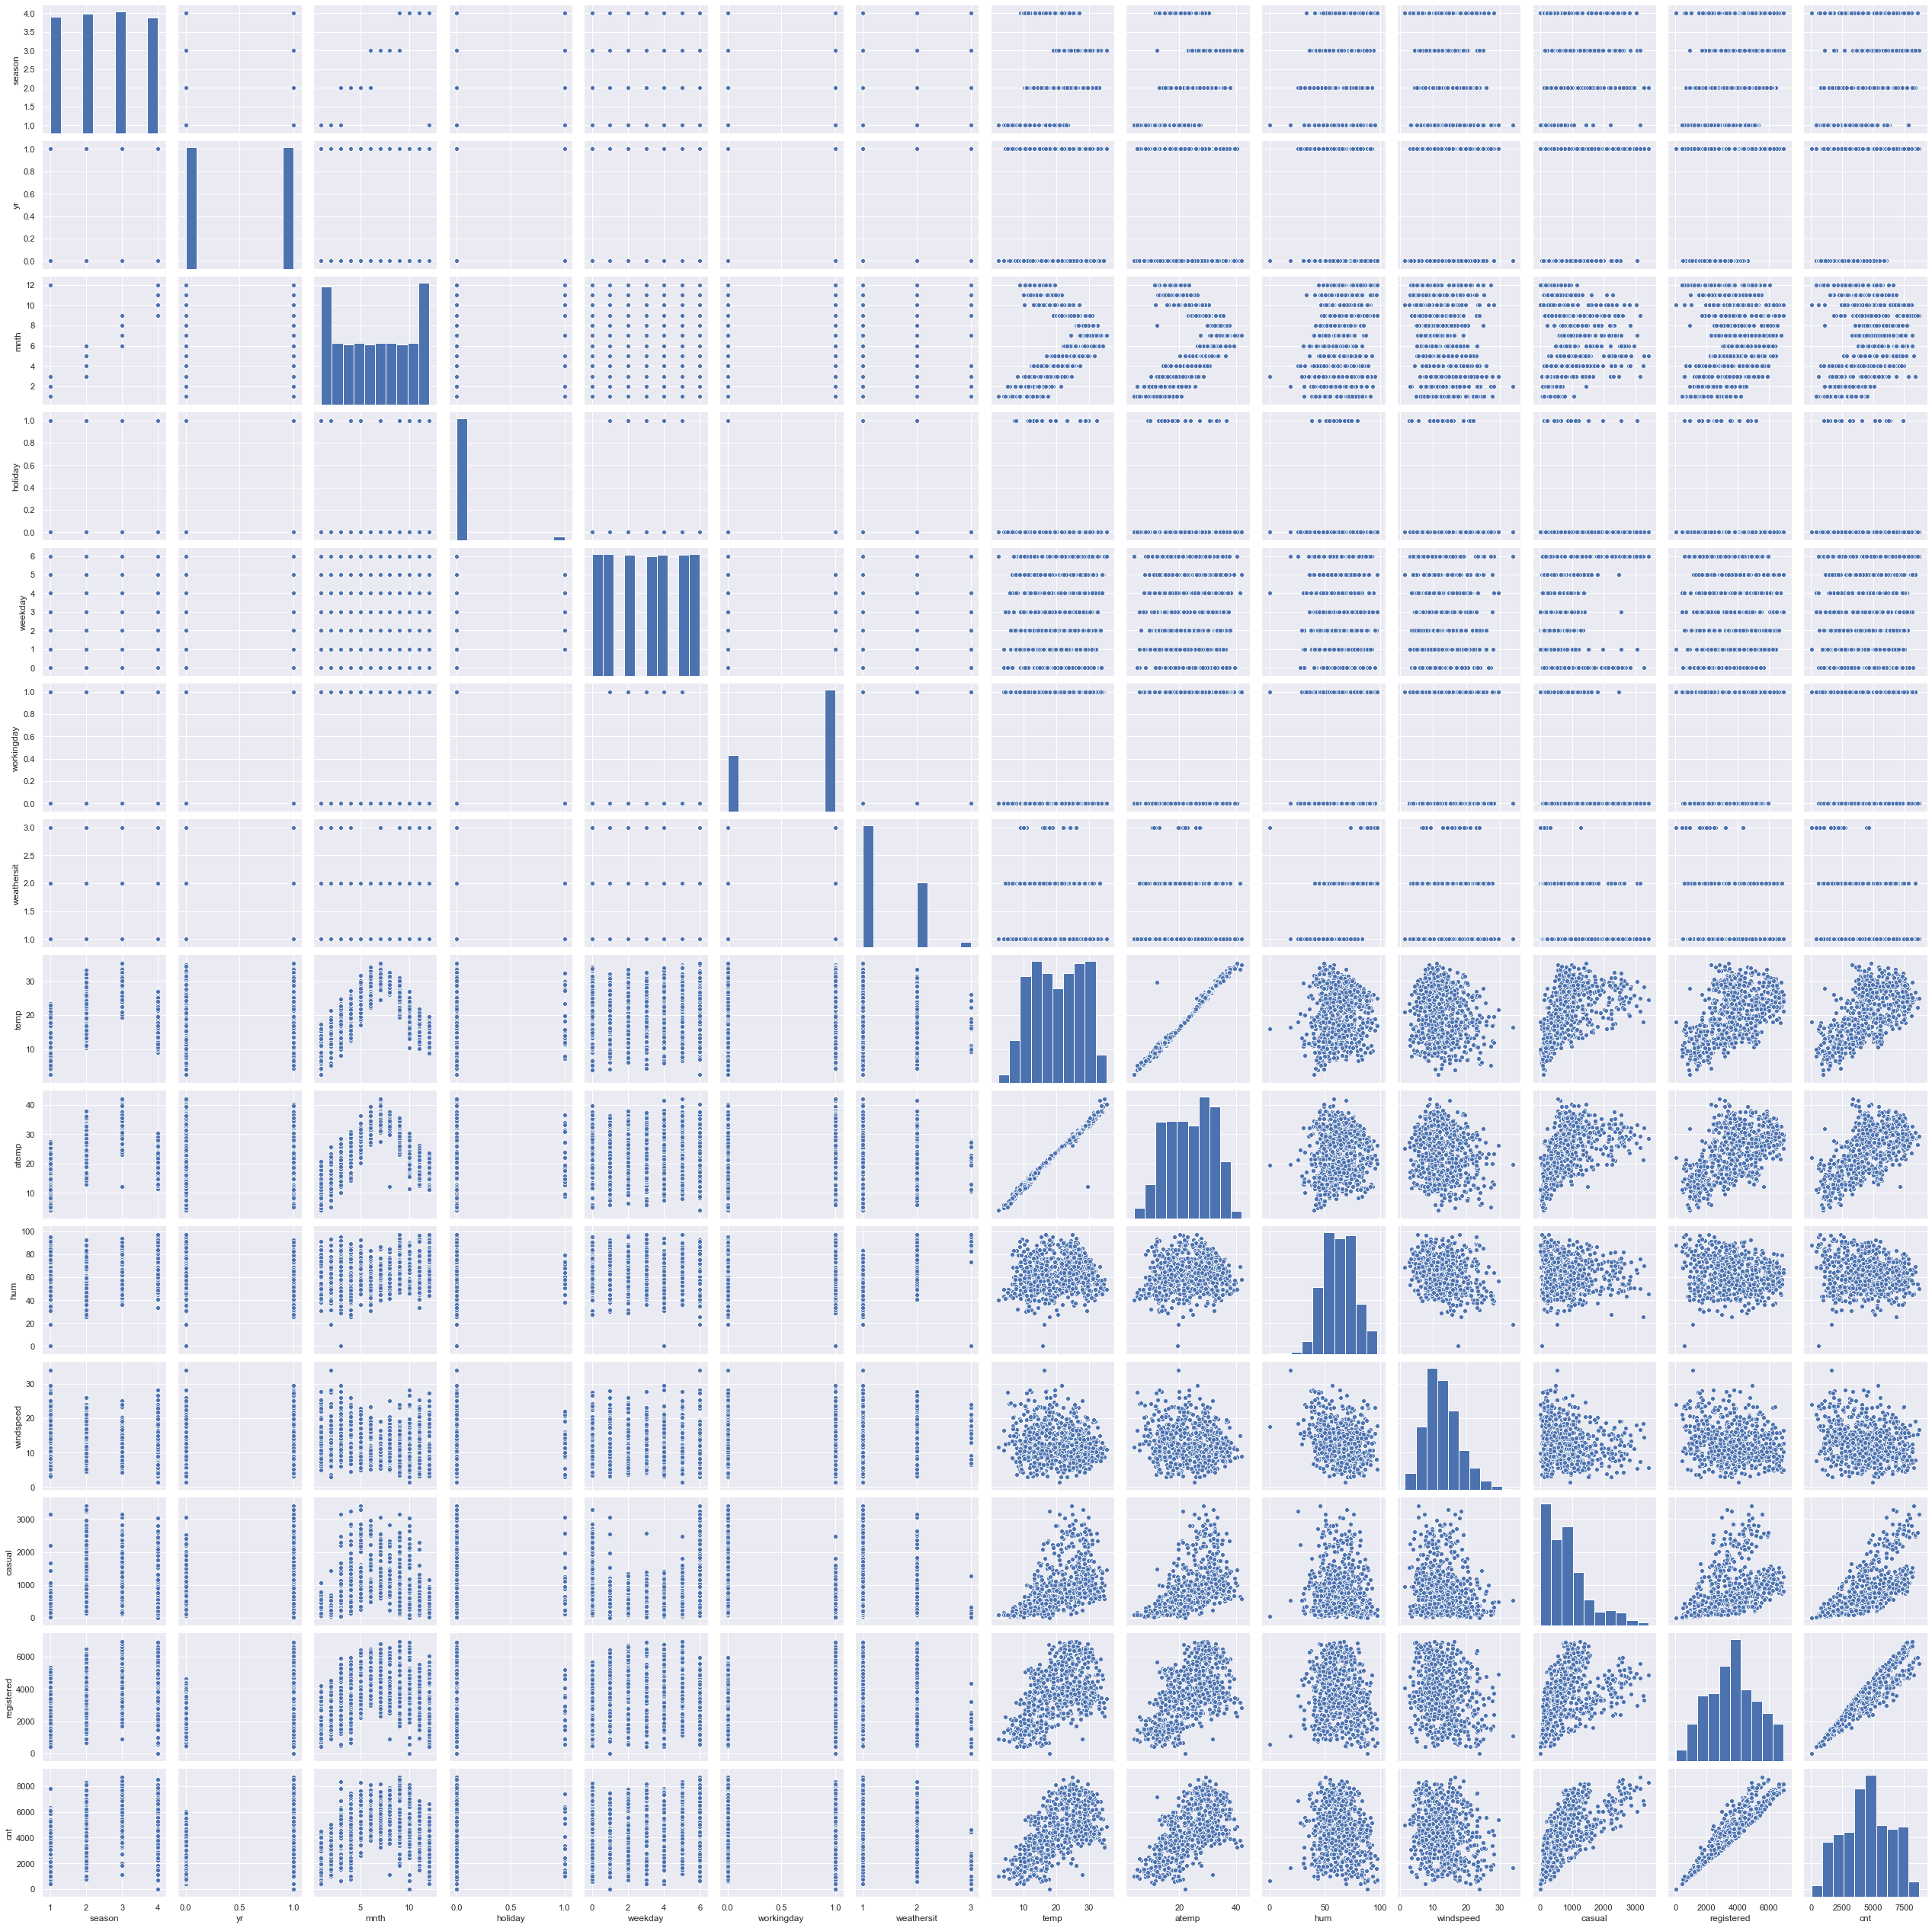

In [11]:
sns.pairplot(boom_bikes)
plt.show()

### Visualizing using the "cnt"as Target Variable

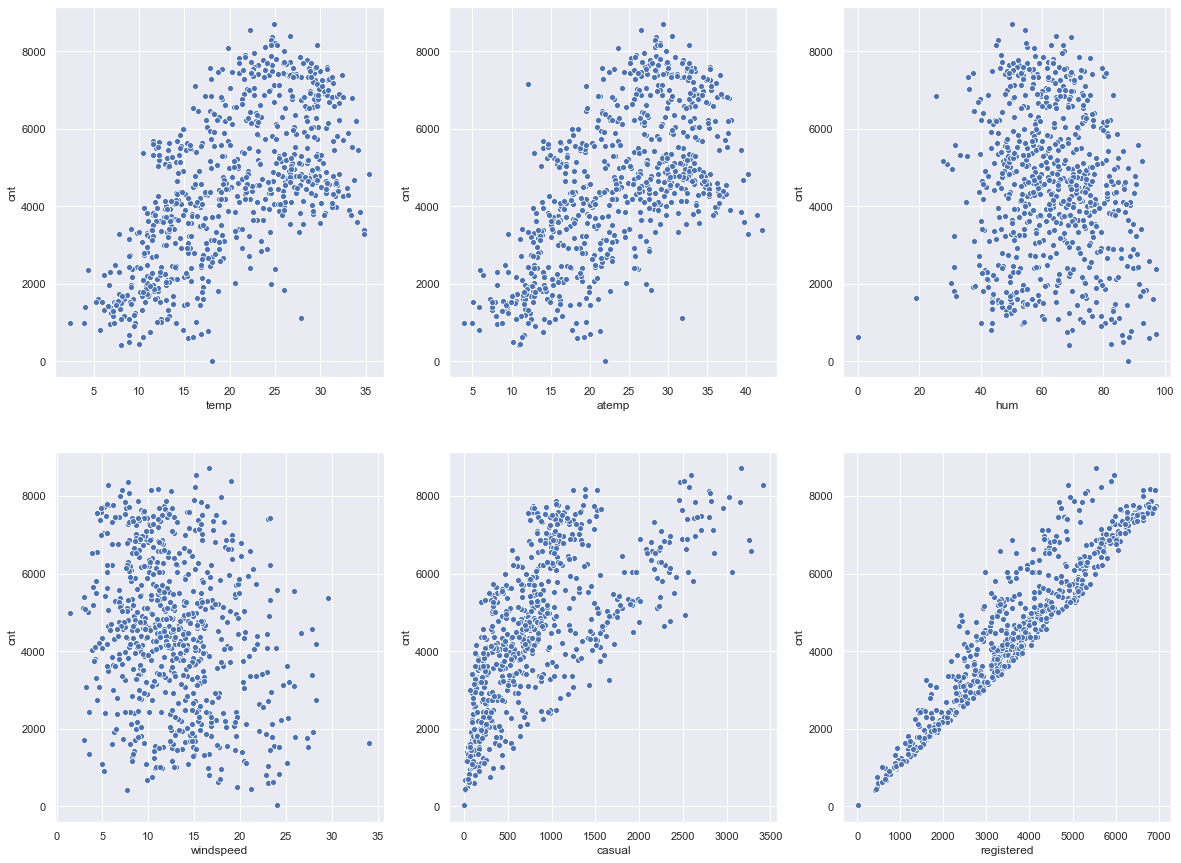

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.scatterplot(x='temp', y='cnt' ,data=boom_bikes)
plt.subplot(2,3,2)
sns.scatterplot(x='atemp', y='cnt', data=boom_bikes)
plt.subplot(2,3,3)
sns.scatterplot(x='hum', y='cnt', data=boom_bikes)
plt.subplot(2,3,4)
sns.scatterplot(x='windspeed', y='cnt', data=boom_bikes)
plt.subplot(2,3,5)
sns.scatterplot(x='casual', y='cnt', data=boom_bikes)
plt.subplot(2,3,6)
sns.scatterplot(x='registered', y='cnt', data=boom_bikes)
plt.show()


#### Finding correlation and then dropping the most co-related variables.

In [13]:
boom_bikes.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543


##### As we can see that the correlation between 'temp' and 'a temp' is high so we will Drop 'a-temp'

In [14]:
boom_bikes.drop(['temp','casual','registered'],axis=1,inplace=True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### Converting some columns to categorical string values

#### Converting following columns in categorical string
     1. mnth
     2. season
     3. weekday
     4. weathersit

In [15]:
# Applying the function to the Month list
boom_bikes['mnth']= boom_bikes['mnth'].map({1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEPT",10:"OCT",11:"NOV",12:"DEC"})

# Applying the function to the Season list
boom_bikes['season']= boom_bikes['season'].map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})

# Applying the function to the Weekday list
boom_bikes['weekday']= boom_bikes['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

# Applying the function to the Wheathersit list
boom_bikes['weathersit']= boom_bikes["weathersit"].map({1:"Clear",2:"Misty+Cloudy",3:"Light+Snow-Rain",4:"Heavy+Snow-Rain"})

In [16]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [17]:
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,JAN,0,Saturday,0,Misty+Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,JAN,0,Sunday,0,Misty+Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,JAN,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,JAN,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,JAN,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

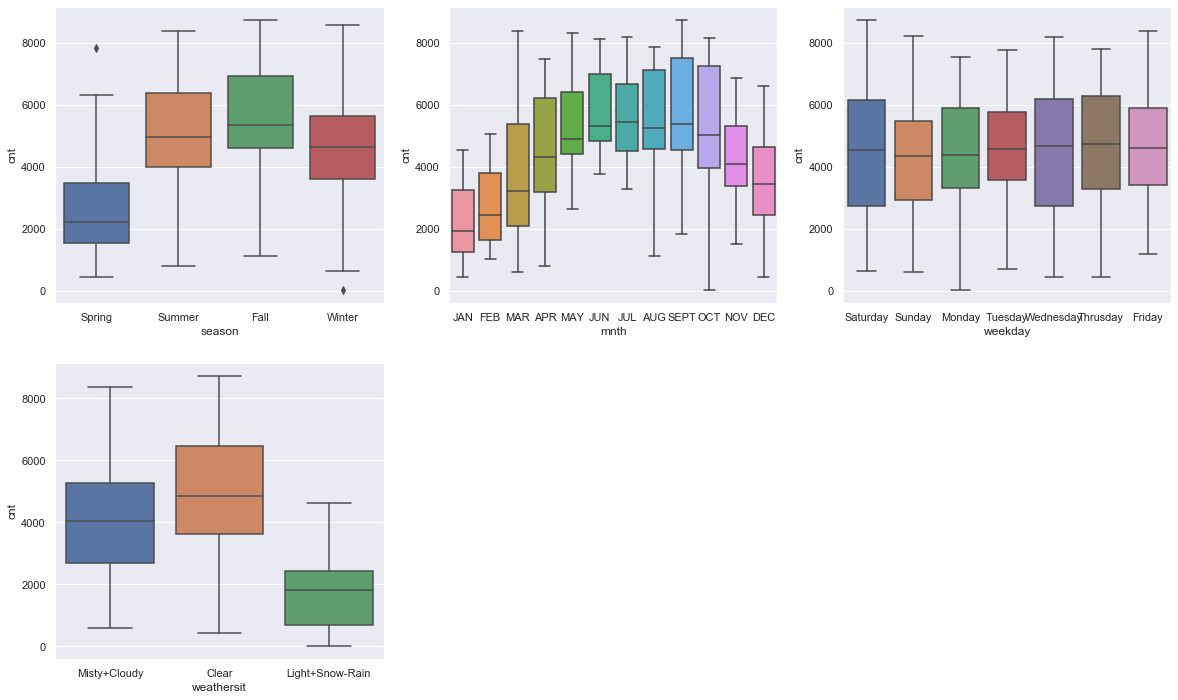

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bikes)
plt.show()

### Dummy Variables

##### Creating dummy variables for the categorical variables.

In [19]:
status = pd.get_dummies(boom_bikes[['season','mnth','weekday','weathersit']], drop_first = True)

In [20]:
boom_bikes = pd.concat([boom_bikes, status], axis = 1)

In [21]:
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_OCT,mnth_SEPT,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light+Snow-Rain,weathersit_Misty+Cloudy
0,Spring,0,JAN,0,Saturday,0,Misty+Cloudy,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,JAN,0,Sunday,0,Misty+Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,JAN,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,JAN,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,JAN,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [22]:
#dropping 'season','mnth','weekday','weathersit' because we have created dummy variables for it
boom_bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boom_bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_OCT,mnth_SEPT,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light+Snow-Rain,weathersit_Misty+Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
boom_bikes.corr()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_OCT,mnth_SEPT,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light+Snow-Rain,weathersit_Misty+Cloudy
yr,1.000000e+00,0.008195,-0.002945,0.047215,-0.112547,-0.011624,0.569728,-1.623119e-17,-5.254075e-18,1.700090e-17,...,8.592246e-18,-9.413392e-18,0.003904,-0.003904,0.003904,2.175587e-19,6.526760e-19,-0.003935,-0.073758,-0.005796
holiday,8.195345e-03,1.000000,-0.252948,-0.032703,-0.015662,0.006257,-0.068764,3.464187e-02,-2.440810e-02,1.678505e-02,...,6.362682e-03,8.174933e-03,0.279764,-0.070541,-0.070541,-2.325423e-02,-4.670117e-02,-0.046213,-0.029619,-0.018668
workingday,-2.945396e-03,-0.252948,1.000000,0.052940,0.023202,-0.018666,0.062542,-2.761520e-02,1.509123e-02,-4.623058e-03,...,-4.023504e-03,-1.087082e-02,0.152976,-0.602419,-0.602419,2.604690e-01,2.688958e-01,0.267305,0.028990,0.048877
atemp,4.721519e-02,-0.032703,0.052940,1.000000,0.141512,-0.183876,0.630685,-6.247724e-01,1.631513e-01,-2.056343e-01,...,-4.775183e-03,1.924774e-01,0.000091,-0.031340,-0.023247,2.045265e-02,2.204543e-02,0.020842,-0.064937,-0.092933
hum,-1.125471e-01,-0.015662,0.023202,0.141512,1.000000,-0.248506,-0.098543,-1.848840e-01,-2.870035e-03,1.639076e-01,...,1.415566e-01,1.831181e-01,0.028591,-0.023310,0.000020,-5.200348e-02,4.061570e-02,0.046059,0.267592,0.490628
windspeed,-1.162435e-02,0.006257,-0.018666,-0.183876,-0.248506,1.000000,-0.235132,1.788801e-01,9.742067e-02,-1.356120e-01,...,-6.013274e-02,-9.482530e-02,0.000999,0.032187,-0.010429,5.792278e-03,6.961095e-03,-0.014025,0.117332,-0.037177
cnt,5.697285e-01,-0.068764,0.062542,0.630685,-0.098543,-0.235132,1.000000,-5.617018e-01,1.453245e-01,6.461909e-02,...,1.088461e-01,1.946635e-01,-0.035991,0.009012,-0.059146,3.355106e-02,5.596898e-04,0.014012,-0.240602,-0.170686
season_Spring,-1.623119e-17,0.034642,-0.027615,-0.624772,-0.184884,0.178880,-0.561702,1.000000e+00,-3.320989e-01,-3.248593e-01,...,-1.742860e-01,-1.711958e-01,0.000993,0.010049,0.010049,-5.854320e-03,-5.854320e-03,-0.012756,-0.022400,0.029198
season_Summer,-5.254075e-18,-0.024408,0.015091,0.163151,-0.002870,0.097421,0.145325,-3.320989e-01,1.000000e+00,-3.296500e-01,...,-1.768562e-01,-1.737204e-01,0.004803,-0.004187,-0.004187,-1.928926e-03,-1.928926e-03,0.009410,-0.043283,0.040011
season_Winter,1.700090e-17,0.016785,-0.004623,-0.205634,0.163908,-0.135612,0.064619,-3.248593e-01,-3.296500e-01,1.000000e+00,...,5.364968e-01,1.591136e-02,0.003611,-0.005479,0.003611,-3.275804e-03,5.851436e-03,-0.001055,0.093128,0.033857


## Building Model
#### Splitting the Data into Training and Testing Sets
    - The first basic step for regression is performing a train-test split.

In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(boom_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features 

 It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
#Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_OCT,mnth_SEPT,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light+Snow-Rain,weathersit_Misty+Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_OCT,mnth_SEPT,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light+Snow-Rain,weathersit_Misty+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


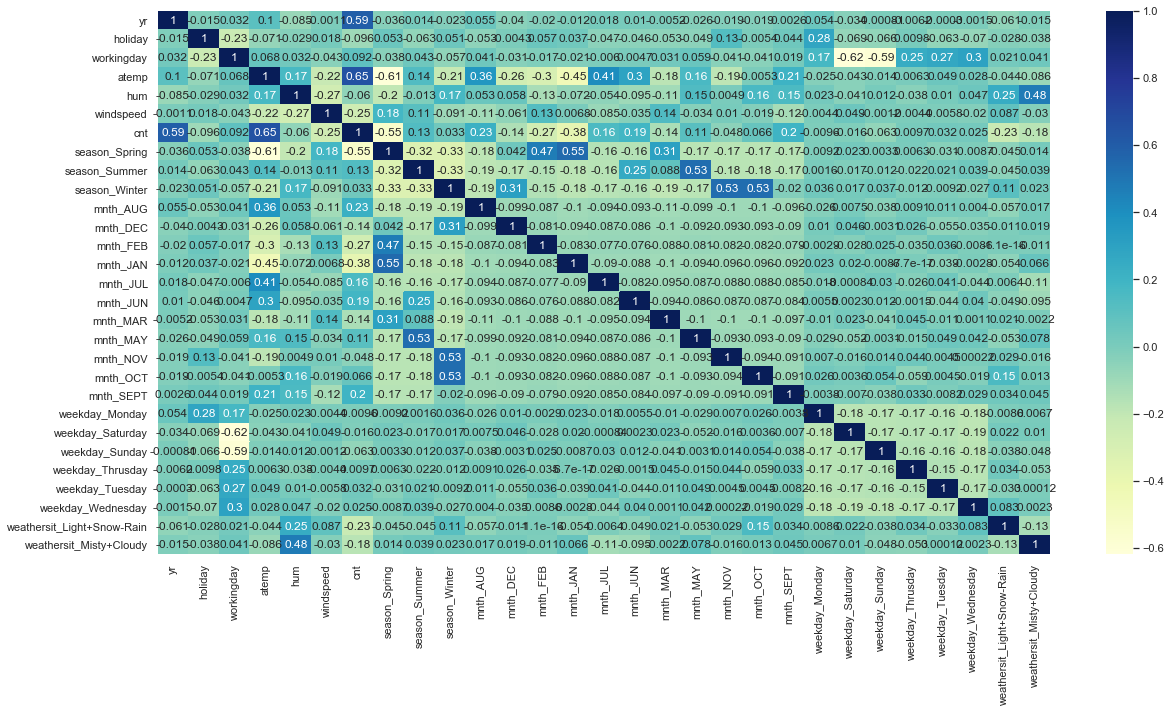

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Diving dataframe into 'X' and 'y' sets

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', True, 1),
 ('mnth_AUG', False, 6),
 ('mnth_DEC', True, 1),
 ('mnth_FEB', False, 3),
 ('mnth_JAN', True, 1),
 ('mnth_JUL', True, 1),
 ('mnth_JUN', False, 7),
 ('mnth_MAR', False, 14),
 ('mnth_MAY', False, 4),
 ('mnth_NOV', True, 1),
 ('mnth_OCT', False, 12),
 ('mnth_SEPT', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light+Snow-Rain', True, 1),
 ('weathersit_Misty+Cloudy', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_DEC', 'mnth_JAN', 'mnth_JUL', 'mnth_NOV',
       'mnth_SEPT', 'weekday_Saturday', 'weathersit_Light+Snow-Rain',
       'weathersit_Misty+Cloudy'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_AUG', 'mnth_FEB', 'mnth_JUN',
       'mnth_MAR', 'mnth_MAY', 'mnth_OCT', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model 1

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary()) #Let's see the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          9.67e-187
Time:                        19:14:34   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [36]:
X_train_rfe1=X_train_rfe.drop(['weekday_Saturday'],axis=1)

In [37]:
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_DEC', 'mnth_JAN', 'mnth_JUL', 'mnth_NOV',
       'mnth_SEPT', 'weathersit_Light+Snow-Rain', 'weathersit_Misty+Cloudy'],
      dtype='object')

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.33
3,atemp,3.39
6,season_Spring,2.69
7,season_Winter,2.30
4,hum,1.91
11,mnth_NOV,1.70
9,mnth_JAN,1.65
14,weathersit_Misty+Cloudy,1.57
8,mnth_DEC,1.44
10,mnth_JUL,1.30


In [39]:
#Again making the model by dropping "hum" variable

In [40]:
X_train_rfe2=X_train_rfe1.drop(['hum'],axis=1)

In [41]:
X_train_rfe2.head()

,const,yr,holiday,atemp,windspeed,season_Spring,season_Winter,mnth_DEC,mnth_JAN,mnth_JUL,mnth_NOV,mnth_SEPT,weathersit_Light+Snow-Rain,weathersit_Misty+Cloudy
653,1.0,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.438975,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,0,0,0,0,1


#### Model 2

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm.summary()) #Let's see the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          3.95e-185
Time:                        19:14:35   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
X_train_rfe3=X_train_rfe2.drop(['const'],axis=1)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,season_Winter,2.55
4,season_Spring,2.35
0,yr,2.06
9,mnth_NOV,1.80
7,mnth_JAN,1.65
12,weathersit_Misty+Cloudy,1.53
6,mnth_DEC,1.46
8,mnth_JUL,1.35


#### Heat Map Analysis

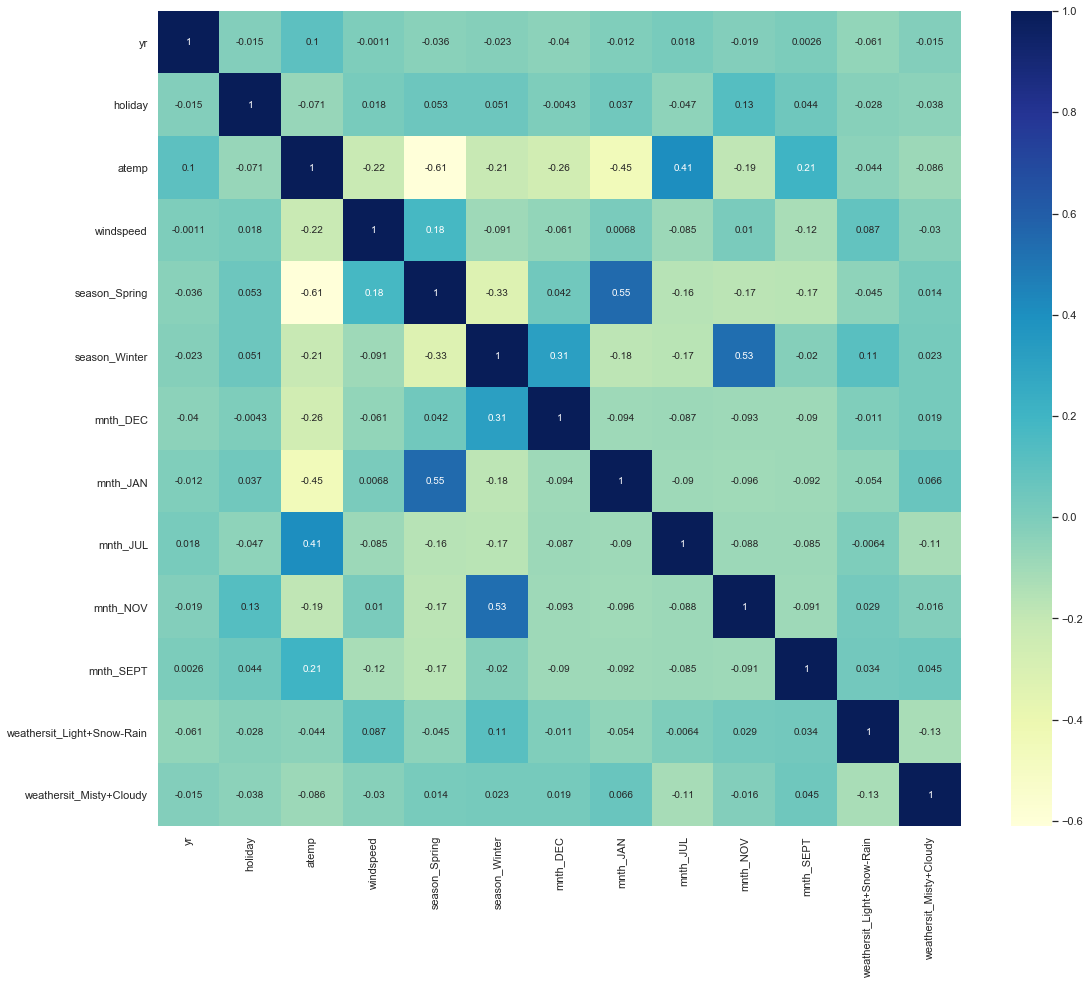

In [60]:
plt.figure(figsize=(18,15))
sns.heatmap(X_train_rfe3.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Conclusion:

#### We can say that the model looks good and no two variables are highly correlated with each other. R-Square value and adjusted r2 is coming really good. Moreover the p-value and VIF values are all under allowed limit.   
    - i.e " VIF <5  & P-Value<0.05

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like. 

In [46]:
y_train_cnt = lm.predict(X_train_rfe2)

In [47]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

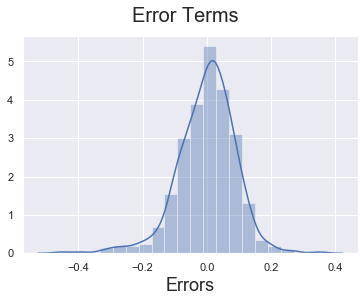

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

#### Applying the scaling on the test sets

In [50]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_AUG,...,mnth_OCT,mnth_SEPT,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light+Snow-Rain,weathersit_Misty+Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Dividing into X_test and y_test

In [51]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#### Prediction code

In [57]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

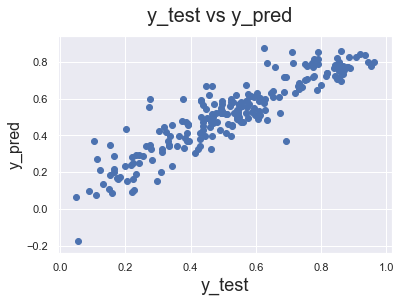

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

## Calculate the R-squared score on the test set.

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8179669424739717

### ANALYSIS:
   - We observed from the value of r-squared on both train and test set, was that : "What all Model has learnt on the training set , it is able to generalize on test set too"

### Model Evaluation:
        -The dependent variable "cnt" is most effected by "yr","atemp" and "weathersit:Light+snow-rain.
        - Month January and july is not good for renting.
        -weathersit_Light+Snow-Rain is not good time for renting.
        -Spring season and high wind is not good for renting bikes.